In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import torch
import torch.nn as nn
import torch.optim as optim

from sklearn.datasets import load_boston

# Load Data

In [0]:
boston_dataset = load_boston()
print(boston_dataset.keys())

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])


In [0]:
# Description of the dataset
print(boston_dataset['DESCR'])

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [0]:
boston = pd.DataFrame(boston_dataset['data'], columns=boston_dataset['feature_names'])  # pandas dataframe
boston['MEDV'] = boston_dataset['target']
print('Boston Housing dataset has {} samples, {} columns'.format(*boston.shape))

Boston Housing dataset has 506 samples, 14 features


In [0]:
boston.head()
#boston.tail()
#boston.sample(5)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


# Explore Data

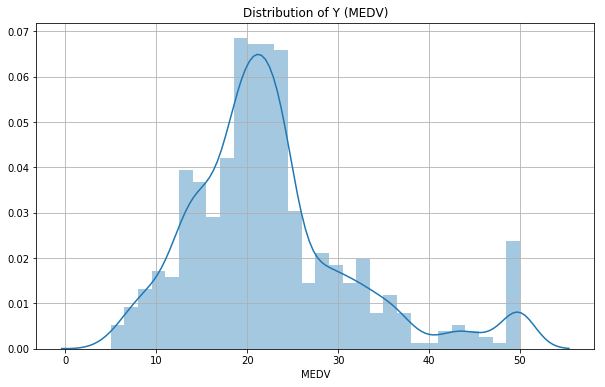

In [0]:
# Distribution of target (Y)
fig, ax = plt.subplots(1, 1, figsize=(10, 6))
sns.distplot(boston['MEDV'], bins=30, ax=ax)
ax.set_title('Distribution of Y (MEDV)')
plt.grid(True)
plt.show(fig)

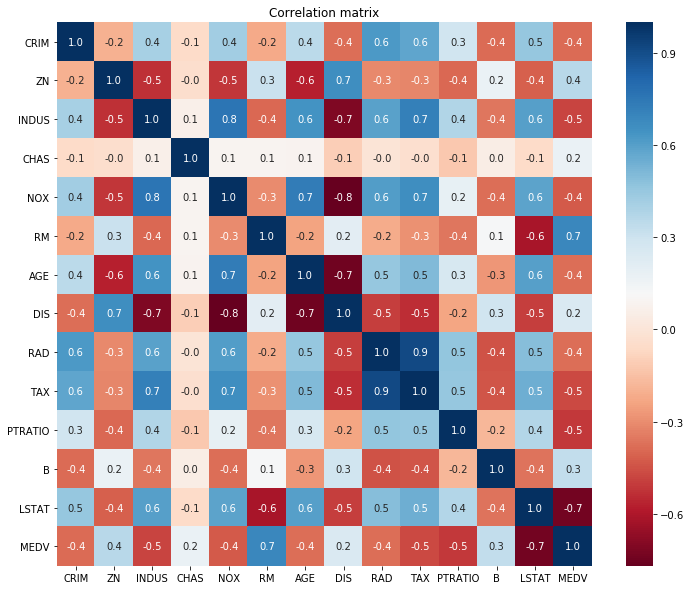

In [0]:
# Check correlation among features
corr_matrix = boston.corr()

fig, ax = plt.subplots(1, 1, figsize=(12, 10))
sns.heatmap(data=corr_matrix, cmap=plt.cm.RdBu, annot=True, fmt='.1f', ax=ax)
ax.set_title('Correlation matrix')
plt.show(fig)

# Prepare Training & Test Data

In [0]:
# pandas dataframe -> numpy array
X = boston.drop('MEDV', axis=1).values
y = boston['MEDV'].values

# Change dtype
X = X.astype(np.float32)
y = y.astype(np.float32).reshape(-1, 1)

# numpy array -> torch float tensor
X = torch.from_numpy(X)
y = torch.from_numpy(y)

print(X.size(), X.dtype)
print(y.size(), y.dtype)

torch.Size([506, 13]) torch.float32
torch.Size([506, 1]) torch.float32


In [0]:
# Split into train & test sets
split_idx = 400
X_train, y_train = X[:split_idx], y[:split_idx]
X_test, y_test = X[split_idx:], y[split_idx:]

# Build & Train Model
- '__init__' 함수 아래에 필요한 연산들을 인스턴스화하고,
- 'forward' 함수 아래에서 실제 연산들을 수행

In [0]:
# Define model
class LinearRegressionModel(nn.Module):
    
    def __init__(self, in_features):
     
        super(LinearRegressionModel, self).__init__()
        self.linear = nn.Linear(in_features, 1, bias=True)
        
    def forward(self, x):
        
        y_pred = self.linear(x)
        return y_pred

In [0]:
# Instantiate model
model = LinearRegressionModel(in_features=X.shape[1])

# Construct loss criterion & optimizer
criterion = torch.nn.MSELoss()
optimizer = torch.optim.Adam(params=model.parameters(), lr=0.001)

In [0]:
# Train model

train_loss_list = []
test_loss_list = []

num_batch_updates = 10000
for i in range(num_batch_updates):
    
    y_train_pred = model(X_train)
    loss = criterion(y_train_pred, y_train)
    
    train_loss = loss.item()
    test_loss = criterion(model(X_test), y_test).item()
    
    train_loss_list.append(train_loss)
    test_loss_list.append(test_loss)
    
    if (i + 1) % 200 == 0:
        print(f'Iteration: {i + 1:>05d} | Training Loss: {train_loss:.3f} | Test loss: {test_loss:.3f}')
    
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

Iteration: 00200 | Training Loss: 362.173 | Test loss: 2344.000
Iteration: 00400 | Training Loss: 235.983 | Test loss: 1382.116
Iteration: 00600 | Training Loss: 151.594 | Test loss: 748.750
Iteration: 00800 | Training Loss: 106.595 | Test loss: 416.891
Iteration: 01000 | Training Loss: 84.541 | Test loss: 263.059
Iteration: 01200 | Training Loss: 72.881 | Test loss: 196.323
Iteration: 01400 | Training Loss: 65.516 | Test loss: 169.460
Iteration: 01600 | Training Loss: 60.195 | Test loss: 160.770
Iteration: 01800 | Training Loss: 56.146 | Test loss: 160.155
Iteration: 02000 | Training Loss: 53.015 | Test loss: 162.680
Iteration: 02200 | Training Loss: 50.560 | Test loss: 165.948
Iteration: 02400 | Training Loss: 48.600 | Test loss: 168.878
Iteration: 02600 | Training Loss: 47.003 | Test loss: 171.042
Iteration: 02800 | Training Loss: 45.676 | Test loss: 172.324
Iteration: 03000 | Training Loss: 44.552 | Test loss: 172.739
Iteration: 03200 | Training Loss: 43.584 | Test loss: 172.348
It

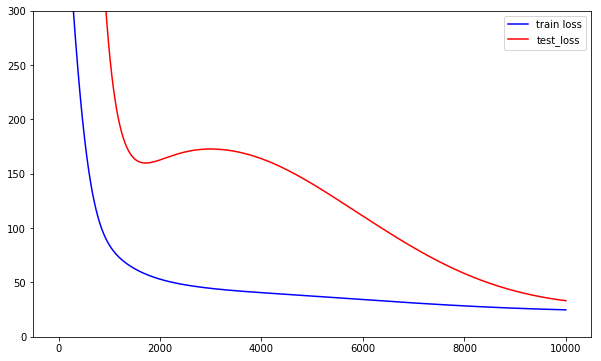

In [0]:
plt.figure(1, figsize=(10,  6))
plt.plot(train_loss_list, c='b', label='train loss')
plt.plot(test_loss_list, c='r', label='test_loss')
plt.legend(loc='best')
plt.ylim(0, 300)
plt.show()